# Задача исследования

Итак, представим:
Наш заказчик - крупная американская авиакомпания, которая провела опрос удовлетворённости своих клиентов, задавая в том числе вопросы по различным элементам сервиса компании. Основная задача, стоящая перед нами как перед исследователями - ответить на вопрос "Какие элементы сервиса авиакомпании влияют на удовлетворённость потребителей?", а также на ряд других вопросов, возникших у сотрудников авиакомпании.

# Описание данных

1. Gender: мужчина или женщина
2. Customer Type: лояльный или нерегулярный клиент авиакомпании
3. Age: фактический возраст пассажира
4. Type of Travel: цель полета пассажира (личная или деловая поездка)
5. Class: бизнес, эконом, эконом плюс
6. Flight Distance: Дальность полета в км
7. Inflight wi-fi service: уровень удовлетворенности услугой Wi-Fi на борту (0: не оценено; 1-5)
8. Departure/Arrival time convenient: уровень удовлетворенности временем отправления/прибытия (0: не оценено; 1-5)
9. Ease of Online booking: уровень удовлетворенности онлайн-бронированием (0: не оценен; 1-5)
10. Gate location: уровень удовлетворенности расположением гейта (0: не оценено; 1-5)
11. Food and drink: уровень удовлетворенности едой и напитками (0: не оценен; 1-5)
12. Online boarding: уровень удовлетворенности онлайн-посадкой (0: не оценен; 1-5)
13. Seat comfort: уровень удовлетворенности сиденьем (0: не оценен; 1-5)
14. Inflight entertainment: удовлетворенность развлечениями в полете (0: не оценено; 1-5)
15. Baggage handling: уровень удовлетворенности обработкой багажа (0: не оценен; 1-5)
16. Checkin service: уровень удовлетворенности сервисом регистрации (0: не оценен; 1-5)
18. Inflight service: уровень удовлетворенности обслуживанием в полете (0: не оценено; 1-5)
19. Cleanliness: уровень удовлетворенности чистотой (0: не оценен; 1-5)
20. Arrival Delay in Minutes: Задержка прибытия в минутах

# Первичная обработка данных

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install plotly==4.14.3
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import scipy.special as sps
from scipy import * 
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
sat = pd.read_csv('Airline Satisfaction.csv')

In [9]:
sat

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [10]:
sat1 = sat.drop('Unnamed: 0', axis = 1)

In [11]:
sat2 = sat1.drop('id', axis = 1)

In [12]:
sat2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [13]:
sat3 = sat2.drop('Leg room service', axis = 1)

In [14]:
sat3

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,1,5,4,1,0,0.0,neutral or dissatisfied


In [15]:
sat4 = sat3.drop('On-board service', axis = 1)

In [16]:
sat4

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,2,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,4,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,1,5,4,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,1,1,5,4,1,0,0.0,neutral or dissatisfied


In [17]:
df = sat4.drop('Departure Delay in Minutes', axis = 1)

In [18]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,4,5,5,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,3,1,4,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,4,4,5,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,3,1,4,2,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,4,3,3,3,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,4,2,3,2,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,4,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,4,5,5,4,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,1,5,4,1,0.0,neutral or dissatisfied


In [19]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.631833,3.304290,3.640428,3.286351,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.180903,1.265396,1.175663,1.312273,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1584.000000


In [20]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

заменим пустые ячейки в столбце "Arrival Delay in Minutes" на "0"

In [22]:
values = {"Arrival Delay in Minutes": 0}
df = df.fillna(value=values)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [24]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score

import statsmodels.api as sm

In [25]:
def sex_define (sex):
    if sex == 'Female':
        return 0
    if sex == 'Male':
        return 1
    else:
        return sex

In [26]:
df['Gender'] = df['Gender'].apply(sex_define)

In [27]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,4,5,5,18.0,neutral or dissatisfied
1,1,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,3,1,4,1,6.0,neutral or dissatisfied
2,0,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,4,4,5,0.0,satisfied
3,0,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,3,1,4,2,9.0,neutral or dissatisfied
4,1,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,4,3,3,3,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,4,2,3,2,0.0,neutral or dissatisfied
103900,1,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,4,0.0,satisfied
103901,1,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,4,5,5,4,14.0,neutral or dissatisfied
103902,0,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,1,5,4,1,0.0,neutral or dissatisfied


In [28]:
def customer_type (customer):
    if customer == 'Loyal Customer':
        return 1
    if customer == 'disloyal Customer':
        return 0
    else:
        return customer

In [29]:
df['Customer Type'] = df['Customer Type'].apply(customer_type)

In [30]:
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [31]:
def type_of_travel (traveler):
    if traveler == 'Business travel':
        return 1
    if traveler == 'Personal Travel':
        return 0
    else:
        return traveler

In [32]:
df['Type of Travel'] = df['Type of Travel'].apply(type_of_travel)

In [33]:
df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [34]:
def class_type (travel):
    if travel == 'Business':
        return 2
    if travel == 'Eco Plus':
        return 1
    if travel == 'Eco':
        return 0
    else:
        return travel

In [35]:
df['Class'] = df['Class'].apply(class_type)

In [36]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,5,3,5,5,4,4,5,5,18.0,neutral or dissatisfied
1,1,0,25,1,2,235,3,2,3,3,1,3,1,1,3,1,4,1,6.0,neutral or dissatisfied
2,0,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,4,4,5,0.0,satisfied
3,0,1,25,1,2,562,2,5,5,5,2,2,2,2,3,1,4,2,9.0,neutral or dissatisfied
4,1,1,61,1,2,214,3,3,3,3,4,5,5,3,4,3,3,3,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,23,1,0,192,2,1,2,3,2,2,2,2,4,2,3,2,0.0,neutral or dissatisfied
103900,1,1,49,1,2,2347,4,4,4,4,2,4,5,5,5,5,5,4,0.0,satisfied
103901,1,0,30,1,2,1995,1,1,1,3,4,1,5,4,4,5,5,4,14.0,neutral or dissatisfied
103902,0,0,22,1,0,1000,1,1,1,5,1,1,1,1,1,5,4,1,0.0,neutral or dissatisfied


In [37]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [38]:
def satisfaction_type (satisfaction):
    if satisfaction == 'neutral or dissatisfied':
        return 0
    if satisfaction == 'satisfied':
        return 1
    else:
        return satisfaction
        

In [39]:
df['satisfaction'] = df['satisfaction'].apply(satisfaction_type)

In [40]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,5,3,5,5,4,4,5,5,18.0,0
1,1,0,25,1,2,235,3,2,3,3,1,3,1,1,3,1,4,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,4,4,5,0.0,1
3,0,1,25,1,2,562,2,5,5,5,2,2,2,2,3,1,4,2,9.0,0
4,1,1,61,1,2,214,3,3,3,3,4,5,5,3,4,3,3,3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,23,1,0,192,2,1,2,3,2,2,2,2,4,2,3,2,0.0,0
103900,1,1,49,1,2,2347,4,4,4,4,2,4,5,5,5,5,5,4,0.0,1
103901,1,0,30,1,2,1995,1,1,1,3,4,1,5,4,4,5,5,4,14.0,0
103902,0,0,22,1,0,1000,1,1,1,5,1,1,1,1,1,5,4,1,0.0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [42]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             103904 non-null  int64
 1   Customer Type                      103904 non-null  int64
 2   Age                                103904 non-null  int64
 3   Type of Travel                     103904 non-null  int64
 4   Class                              103904 non-null  int64
 5   Flight Distance                    103904 non-null  int64
 6   Inflight wifi service              103904 non-null  int64
 7   Departure/Arrival time convenient  103904 non-null  int64
 8   Ease of Online booking             103904 non-null  int64
 9   Gate location                      103904 non-null  int64
 10  Food and drink                     103904 non-null  int64
 11  Online boarding                    103904 non-null  int64
 12  Se

In [44]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,5,3,5,5,4,4,5,5,18,0
1,1,0,25,1,2,235,3,2,3,3,1,3,1,1,3,1,4,1,6,0
2,0,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,4,4,5,0,1
3,0,1,25,1,2,562,2,5,5,5,2,2,2,2,3,1,4,2,9,0
4,1,1,61,1,2,214,3,3,3,3,4,5,5,3,4,3,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,23,1,0,192,2,1,2,3,2,2,2,2,4,2,3,2,0,0
103900,1,1,49,1,2,2347,4,4,4,4,2,4,5,5,5,5,5,4,0,1
103901,1,0,30,1,2,1995,1,1,1,3,4,1,5,4,4,5,5,4,14,0
103902,0,0,22,1,0,1000,1,1,1,5,1,1,1,1,1,5,4,1,0,0


# Датасет для исследования

После получения результатов исследования, авиакомпания решила сначала проанализировать переменные, которые она применяла при прошлых опросах. Эти предикторы, а также возраст и пол респондентов отражены в df_1, с которым мы и будем работать в данном исследовании.

In [466]:
df_1 = pd.DataFrame(data = df, columns = ['Age','Gender', 'Seat comfort', 'Inflight service', 'Checkin service', 'Departure/Arrival time convenient' , 'Arrival Delay in Minutes' , 'satisfaction'])

In [467]:
df_1

,Age,Gender,Seat comfort,Inflight service,Checkin service,Departure/Arrival time convenient,Arrival Delay in Minutes,satisfaction
0,13,1,5,5,4,4,18,0
1,25,1,1,4,1,2,6,0
2,26,0,5,4,4,2,0,1
3,25,0,2,4,1,5,9,0
4,61,1,5,3,3,3,0,1
...,...,...,...,...,...,...,...,...
103899,23,0,2,3,2,1,0,0
103900,49,1,5,5,5,4,0,1
103901,30,1,5,5,5,1,14,0
103902,22,0,1,4,5,1,0,0


# Разведочный анализ данных, EDA

In [468]:
df_1.describe()

,Age,Gender,Seat comfort,Inflight service,Checkin service,Departure/Arrival time convenient,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,0.492541,3.439396,3.640428,3.304290,3.060296,15.133392,0.433333
std,15.114964,0.499947,1.319088,1.175663,1.265396,1.525075,38.649776,0.495538
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,0.000000,4.000000,4.000000,3.000000,3.000000,0.000000,0.000000
75%,51.000000,1.000000,5.000000,5.000000,4.000000,4.000000,13.000000,1.000000
max,85.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1584.000000,1.000000


In [469]:
def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15,10))
    sns.histplot(x=x, ax=ax[0], kde=True)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x=x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x=x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()


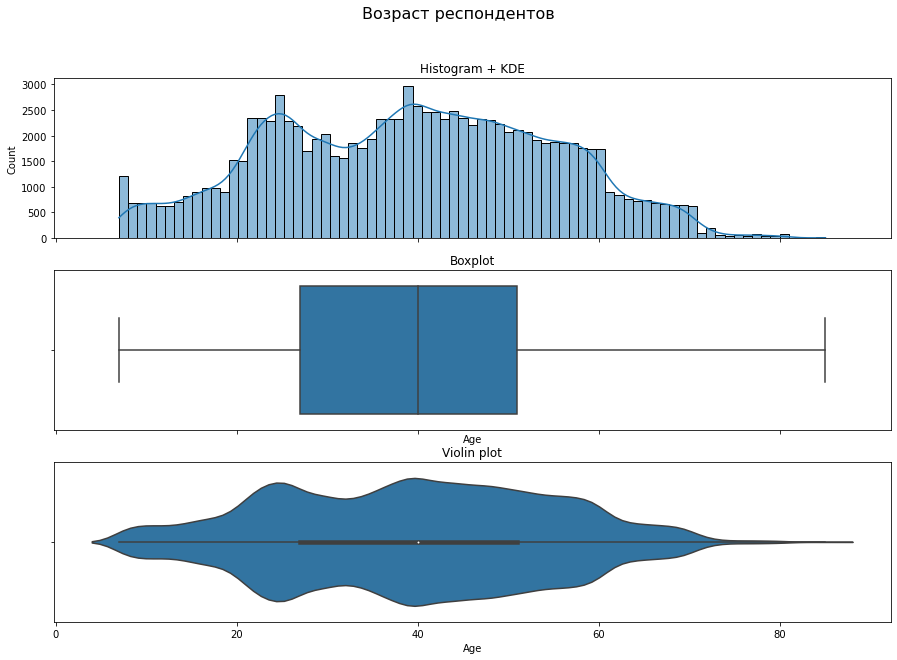

In [555]:
plot_comparison(df['Age'], 'Возраст респондентов')

In [471]:
categorical_indexes = [2,3,4,5]
df_1.iloc[:,categorical_indexes] = df_1.iloc[:,categorical_indexes].astype('category')

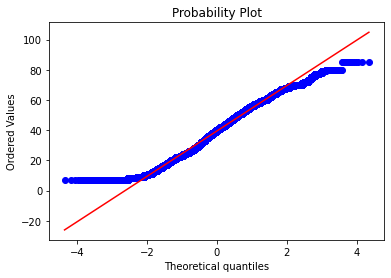

<Figure size 432x288 with 0 Axes>

In [595]:
stats.probplot(df_1['Age'], plot = plt)

plt.figure()
plt.show()

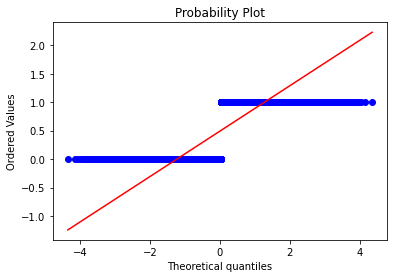

<Figure size 432x288 with 0 Axes>

In [606]:
stats.probplot(df_1['Gender'], plot = plt)

plt.figure()
plt.show()

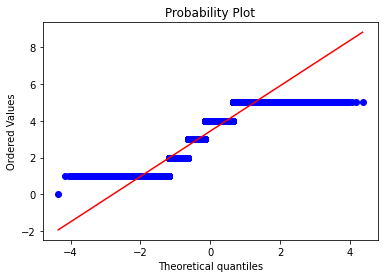

<Figure size 432x288 with 0 Axes>

In [605]:
stats.probplot(df_1['Seat comfort'], plot = plt)

plt.figure()
plt.show()

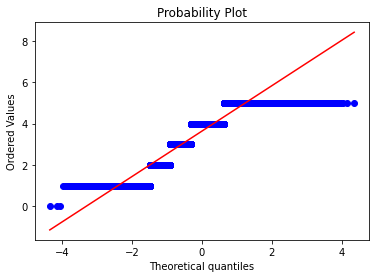

<Figure size 432x288 with 0 Axes>

In [604]:
stats.probplot(df_1['Inflight service'], plot = plt)

plt.figure()
plt.show()

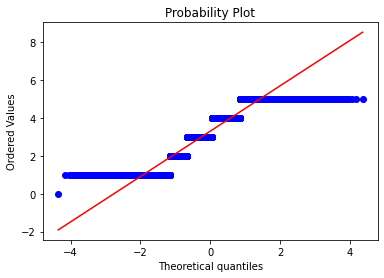

<Figure size 432x288 with 0 Axes>

In [603]:
stats.probplot(df_1['Checkin service'], plot = plt)

plt.figure()
plt.show()

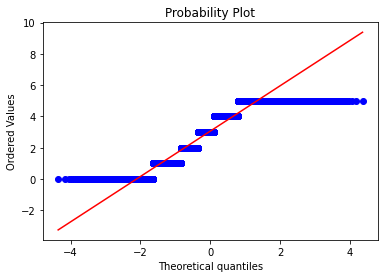

<Figure size 432x288 with 0 Axes>

In [602]:
stats.probplot(df_1['Departure/Arrival time convenient'], plot = plt)

plt.figure()
plt.show()

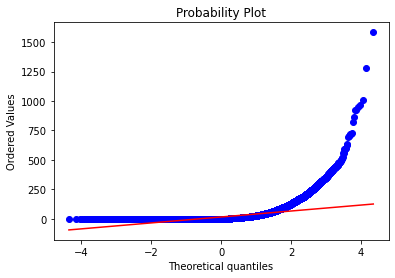

<Figure size 432x288 with 0 Axes>

In [607]:
stats.probplot(df_1['Arrival Delay in Minutes'], plot = plt)

plt.figure()
plt.show()

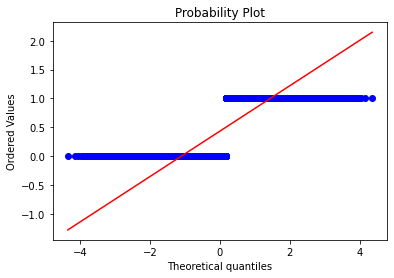

<Figure size 432x288 with 0 Axes>

In [608]:
stats.probplot(df_1['satisfaction'], plot = plt)

plt.figure()
plt.show()

как мы видим из графиков выше, ни одна из переменных в датасете не распределена нормально.

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

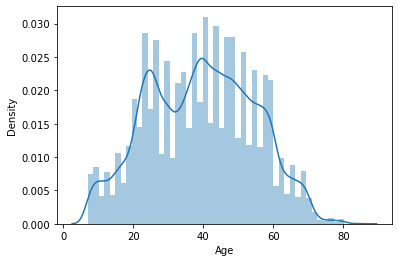

In [472]:
sns.distplot(df_1['Age'])

In [473]:
df_1['satisfaction'] = df_1['satisfaction'].astype('int')

In [474]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Age                                103904 non-null  int64   
 1   Gender                             103904 non-null  int64   
 2   Seat comfort                       103904 non-null  category
 3   Inflight service                   103904 non-null  category
 4   Checkin service                    103904 non-null  category
 5   Departure/Arrival time convenient  103904 non-null  category
 6   Arrival Delay in Minutes           103904 non-null  int32   
 7   satisfaction                       103904 non-null  int32   
dtypes: category(4), int32(2), int64(2)
memory usage: 2.8 MB


In [475]:
df_1['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

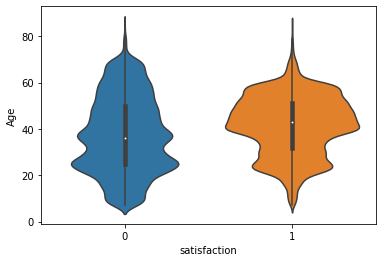

In [476]:
sns.violinplot(x = df_1['satisfaction'], y = df_1['Age'])

([<matplotlib.patches.Wedge at 0x2353296bac0>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'Neutral or dissatisfied'),
  Text(0.228705062722272, -1.0759618925804026, 'Satisfied')],
 [Text(-0.12474821603032998, 0.5868883050438559, '56.7%'),
  Text(0.12474821603033018, -0.5868883050438559, '43.3%')])

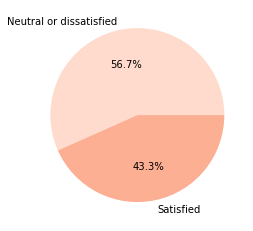

In [477]:
plt.pie(df_1.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Reds"), autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x235349f4c10>,
 [Text(-0.025773424500537056, 1.0996980179074232, 'Female'),
  Text(0.02577342450053692, -1.0996980179074232, 'Male')],
 [Text(-0.014058231545747483, 0.5998352824949581, '50.7%'),
  Text(0.01405823154574741, -0.5998352824949581, '49.3%')])

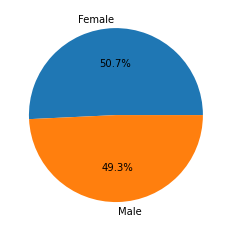

In [478]:
plt.pie(df_1.Gender.value_counts(), labels = ["Female", "Male"], autopct = '%1.1f%%')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

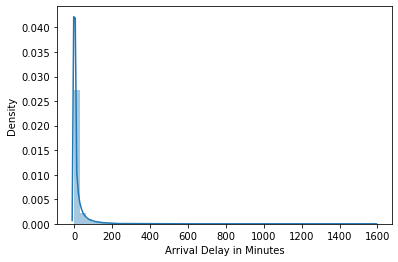

In [480]:
sns.distplot(df_1['Arrival Delay in Minutes'])

Как мы можем видеть на графике распределения задержки прибытия рейса, мы имеем длинный "хвост" слева, так как были опрошенны, чей рейс задержали не на несколько минут, а на неслолько часов и даже дней.

In [481]:
df['Arrival Delay in Minutes'].describe()

count    103904.000000
mean         15.133392
std          38.649776
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [558]:
df_on_time = df_1[df_1['Arrival Delay in Minutes'] == 0]

In [560]:
len(df_on_time)/len(df_1['Arrival Delay in Minutes'])

0.5627213581767786

56,27% рейсов авиакомпании прилетели без задержки, это не высокий показатель.

Text(0.5, 1.0, 'QQ plot')

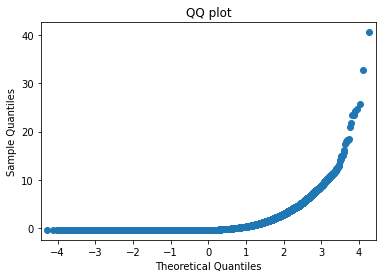

In [482]:
sm.qqplot(df_1['Arrival Delay in Minutes'], fit = True)
plt.title('QQ plot')

In [483]:
def my_norm_confidence(df=df, column = 'Arrival Delay in Minutes', alpha = 0.99):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

In [484]:
confidence = my_norm_confidence()

Text(0.5, 1.0, 'Доверительный интервал')

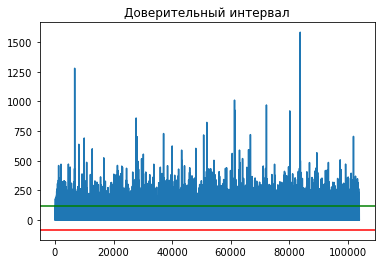

In [485]:
df['Arrival Delay in Minutes'].plot()
plt.axhline(y = confidence[1], color = 'g', linestyle = '-')
plt.axhline(y = confidence[0], color = 'r', linestyle = '-')
plt.title('Доверительный интервал')

Мы можем видеть множество выбросов по переменной 'Arrival Delay in Minutes'. Однако, связаны ли они с механической ошибкой при вводе данных или это реальные показатели?

Проанализируем описательные статистики данных без выбросов и сравним их со статистиками оригинальных данных.

In [486]:
no_outliers  = df_1[df_1['Arrival Delay in Minutes']< confidence[1]]

In [487]:
no_outliers.describe()

,Age,Gender,Arrival Delay in Minutes,satisfaction
count,101009.000000,101009.000000,101009.000000,101009.000000
mean,39.388441,0.492580,10.158372,0.435268
std,15.117492,0.499947,20.047757,0.495795
min,7.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,11.000000,1.000000
max,85.000000,1.000000,114.000000,1.000000


Мы видим, что средний показатель задержки прибытия рейса при исключении выбросов из датасета снизился с 15 до 10 минут. А максимальное значение по данному показателю стало равно 114 минут (меньше 2 часов), что не соотносится с реальной статистикой авиации. В связи с этим, мы можем принять решение об оставлении выбросов в датасете, так как они не являются механической ошибкой при вводе данных, а истинными значениями.

In [488]:
df_1['Seat comfort'].value_counts()

4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64

([<matplotlib.patches.Wedge at 0x235356bb610>,
 [Text(0.6304829159873312, 0.9013829888832561, '4'),
  Text(-1.0042207101891918, 0.4489329184044267, '5'),
  Text(-0.6441180705125005, -0.8916904795046617, '3'),
  Text(0.41833866831639477, -1.0173459385043349, '2'),
  Text(1.027475503100605, -0.39280286471480674, '1'),
  Text(1.0999999995014655, -3.311760547643624e-05, '0')],
 [Text(0.34389977235672603, 0.491663448481776, '30.6%'),
  Text(-0.5477567510122864, 0.24487250094786905, '25.5%'),
  Text(-0.3513371293704548, -0.48637662518436087, '18.0%'),
  Text(0.22818472817257893, -0.5549159664569098, '14.3%'),
  Text(0.5604411835094208, -0.2142561080262582, '11.6%'),
  Text(0.599999999728072, -1.8064148441692496e-05, '0.0%')])

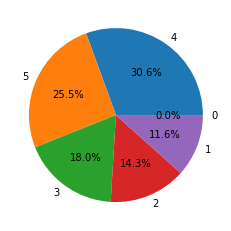

In [489]:
plt.pie(df_1['Seat comfort'].value_counts(), labels = ['4', '5', '3', '2', '1', '0'], autopct = '%1.1f%%')

In [490]:
df_1['Inflight service'].value_counts()

4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64

([<matplotlib.patches.Wedge at 0x23535716bb0>,
 [Text(0.4520582815690275, 1.0028176853570434, '4'),
  Text(-1.0995945605756496, 0.02986305999799829, '5'),
  Text(-0.17995072101153792, -1.085180970164621, '3'),
  Text(0.7858885760427413, -0.7696617088341557, '2'),
  Text(1.0748216811139937, -0.23400502944870316, '1'),
  Text(1.0999999954712334, -9.981626561150666e-05, '0')],
 [Text(0.24657724449219678, 0.5469914647402054, '36.5%'),
  Text(-0.5997788512230816, 0.016288941817089973, '26.1%'),
  Text(-0.09815493873356612, -0.5919168928170658, '19.5%'),
  Text(0.4286664960233134, -0.4198154775459031, '11.0%'),
  Text(0.5862663715167238, -0.12763910697201988, '6.8%'),
  Text(0.5999999975297635, -5.444523578809454e-05, '0.0%')])

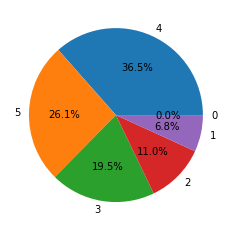

In [491]:
plt.pie(df_1['Inflight service'].value_counts(), labels = ['4', '5', '3', '2', '1', '0'], autopct = '%1.1f%%')

In [492]:
df_1['Checkin service'].value_counts()

4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64

([<matplotlib.patches.Wedge at 0x235370b70d0>,
 [Text(0.7021427762608342, 0.8467558808444902, '4'),
  Text(-0.9521175997775471, 0.5508829968276775, '3'),
  Text(-0.6317904362049822, -0.9004670147872816, '5'),
  Text(0.429815830361211, -1.0125504194710024, '2'),
  Text(1.0174850743768333, -0.41800014763199544, '1'),
  Text(1.09999999949836, -3.3220594909104784e-05, '0')],
 [Text(0.38298696886954586, 0.4618668440969945, '28.0%'),
  Text(-0.5193368726059346, 0.3004816346332786, '27.4%'),
  Text(-0.3446129652027175, -0.4911638262476081, '19.8%'),
  Text(0.23444499837884233, -0.5523002288023648, '12.4%'),
  Text(0.554991858751, -0.22800008052654291, '12.4%'),
  Text(0.5999999997263782, -1.8120324495875336e-05, '0.0%')])

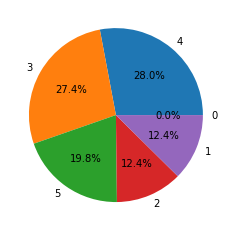

In [493]:
plt.pie(df_1['Checkin service'].value_counts(), labels = ['4', '3', '5', '2', '1', '0'], autopct = '%1.1f%%')

In [494]:
df_1['Departure/Arrival time convenient'].value_counts() 

4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64

([<matplotlib.patches.Wedge at 0x235371175b0>,
 [Text(0.7878640688908611, 0.7676393742837431, '4'),
  Text(-0.6668988859512714, 0.8747833308408164, '5'),
  Text(-1.0504969708820786, -0.32627613177732995, '3'),
  Text(-0.22571128174594535, -1.0765938961802648, '2'),
  Text(0.774942923781546, -0.7806814106156937, '1'),
  Text(1.0859064403796352, -0.17551980726410846, '0')],
 [Text(0.42974403757683327, 0.41871238597295074, '24.6%'),
  Text(-0.3637630287006935, 0.4771545440949907, '21.6%'),
  Text(-0.5729983477538609, -0.17796879915127087, '17.3%'),
  Text(-0.12311524458869745, -0.5872330342801443, '16.5%'),
  Text(0.42269614024447955, -0.42582622397219655, '14.9%'),
  Text(0.5923126038434373, -0.09573807668951369, '5.1%')])

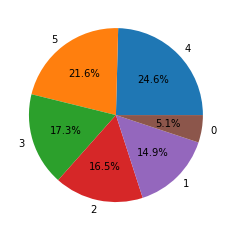

In [495]:
plt.pie(df_1['Departure/Arrival time convenient'].value_counts(), labels = ['4', '5', '3', '2', '1', '0'], autopct = '%1.1f%%')

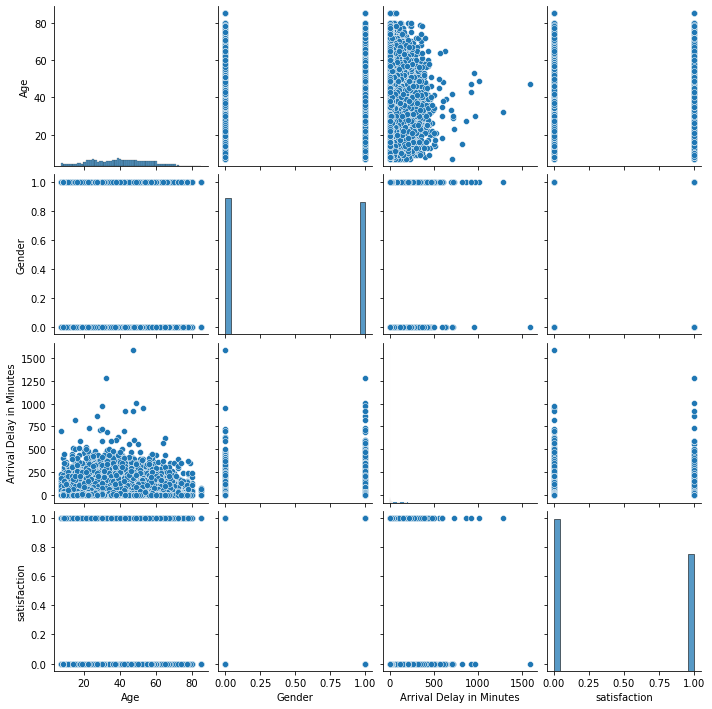

In [496]:
sns.pairplot(df_1)

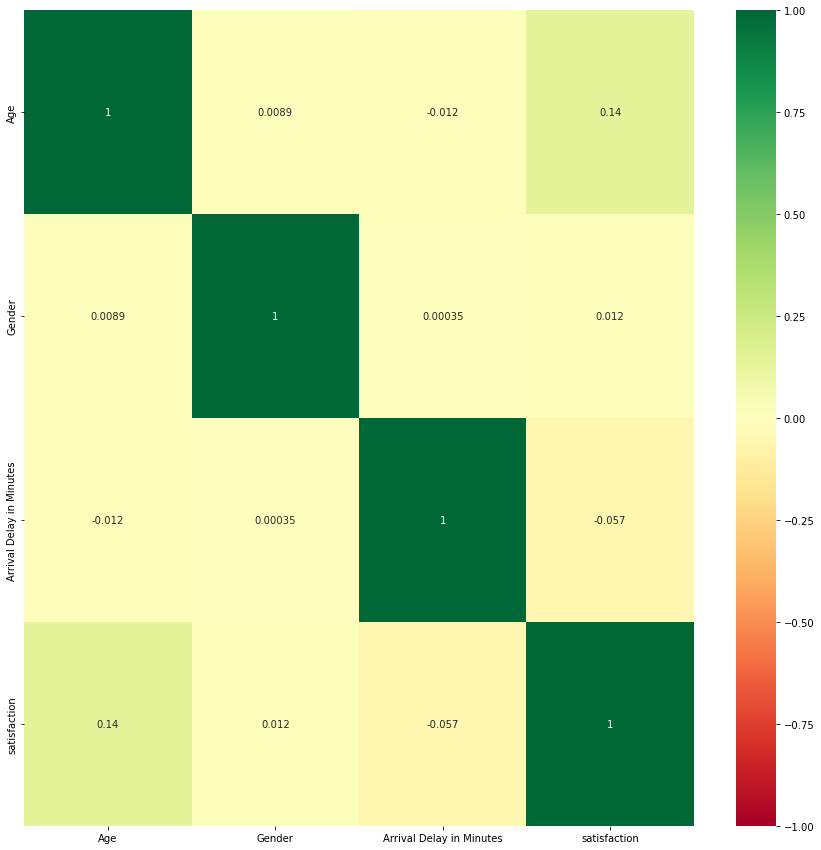

In [497]:
plt.figure(figsize = (15,15))
heat = sns.heatmap(df_1.corr(), annot = True, cmap = 'RdYlGn', vmax = 1, vmin = -1)

Из корреляционной матрицы мы видим, что между ни одной из переменных нет сильной связи. Наиболее сильная связь наблюдается между переменными "Seat comfort" и 'satisfaction', хотя, она всё еще умеренная (0,35)

Создадим типичный портрет удовлетворённого потребителя нашей авиакомпании.

In [498]:
df_satisfied = df_1[df_1['satisfaction'] == 1]

In [500]:
df_sati = pd.DataFrame(df_satisfied).describe()

In [501]:
df_satisfaction = pd.DataFrame(df_sati.iloc[1]).reset_index()

In [502]:
df_satisfaction

,index,mean
0,Age,41.750583
1,Gender,0.499522
2,Arrival Delay in Minutes,12.594892
3,satisfaction,1.000000


In [503]:
df_satisfaction['feature'] = df_satisfaction['index']

In [504]:
df_satisfaction

,index,mean,feature
0,Age,41.750583,Age
1,Gender,0.499522,Gender
2,Arrival Delay in Minutes,12.594892,Arrival Delay in Minutes
3,satisfaction,1.000000,satisfaction


In [505]:
trace = go.Bar(x = df_satisfaction['feature'], y = df_satisfaction['mean'])
fig = go.Figure(data=trace)
fig

Таким образом, выше мы получили портрет типичного удовлетворённого клиента авиакомпании. Ему 41 год, она женщина, больше всего она недовольна временем отправления и прибытия, и в среднем её рейс задерживается на 12 минут.

# Формулирование гипотез

По итогам разведочного анализа данных, мы можем сформулировать гипотезы данного исследования, связанные с маркетинговыми задачами анализируемой авиакомпании:
1. Авиакомпания заметила, что распределение её пассажиров по гендерному признаку примерно равно. Однако, стоит ли таргетировать рекламу отдельно на мужскую и женскую аудиторию, одинаково ли две данные группы удовлетворены услугами ивиакомпании?

Гипотеза 1: Между мужчинами и женщинами существует статистически значимое различие в уровне удовлетворённости услугой авиакомпании.

2. Авиакомпания провела опрос своих пассажиров по различнвм параметрам оценки сервиса авиакомпании и узнала, удовлетворены ли они её услугами или нет. Авиакомпания хочет узнать, какие элементы сервиса оказывают наибольшее влияние на итоговую удовлетворённость потребителей и соответственно принять меры по их улучшению.

Гипотеза 2: Комфорт сиденья на борту оказывает значимое положительное влияние на итоговый уровень удовлетворённости потребителя.

Гипотеза 3: Обслуживание на борту оказывает значимое положительное влияние на итоговый уровень удовлетворённости потребителя.

Гипотеза 4: Обслуживание на стойках регистрации оказывает значимое положительное влияние на итоговый уровень удовлетворённости потребителя.

Гипотеза 5: Удобство времени отправления/прибытия оказывает значимое положительное влияние на итоговый уровень удовлетворённости потребителя.

Гипотеза 6: Задержка прибытия рейса оказывает значимое отрицательное влияние на итоговый уровень удовлетворённости потребителя.

3. Авиакомпания заметила, что в последнее время увеличилось среднее время задержки прилёта их рейсов. Отдел сервиса компании объясняет это тем, что летать в последние месяцы в основном молодые люди, которые, в отличие от более пожилых, чаще приезжают на рейс поздно и приходится задерживать рейс, чтобы такие пассажиры успели на рейс. Отдел маркетинга убеждён, что между возрастом пассажира и временем задержки прилёта рейса нет зависимости и что всной задержкам погодные условия и необходимость противообледенительной обработки самолёта перед вылетом. Кто же прав?

Гипотеза 7: Задержка рейса не объясняется возрастом пассажиров.

# Гипотеза 1
Гипотеза 1(0): Между мужчинами и женщинами различие в уровне удовлетворённости услугой авиакомпании не является статистически значимым.
Гипотеза 1(1): Между мужчинами и женщинами существует статистически значимое различие в уровне удовлетворённости услугой авиакомпании.

Для определения типа теста, с помощью которых будет проверяться Гипотеза 1, необходимо проверить распределение признака на нормальность.

In [563]:
female = df_1[df_1['Gender'] == 0]['satisfaction']

In [564]:
male = df_1[df_1['Gender'] == 1]['satisfaction']

<AxesSubplot:>

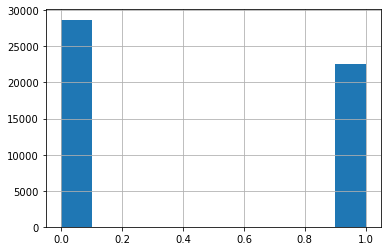

In [565]:
male.hist()

Как мы видим, распределение признака не нормальной формы, следовательно, не выполняется предпосылка для использования параметрических тестов, поэтому будем использовать для проверки гипотезы непараметрический критерий независимости хи-квадрат.

In [506]:
ct_o = df_1.groupby('Gender')['satisfaction'].value_counts().unstack()
ct_o

satisfaction,0,1
Gender,,
0,30193,22534
1,28686,22491


In [507]:
import scipy.stats

In [508]:
chi_2 = scipy.stats.chi2_contingency(ct_o, correction = False)

In [509]:
ddof = 1

In [510]:
critical_value = 3.8
alpha = 0.05

In [511]:
print(chi_2[0], critical_value)
print(chi_2[0]>critical_value)

15.493668870573625 3.8
True


# Вывод по гипотезе 1

Гипотеза Н1(0) отвергается, существует статистически значимое различие в уровне удовлетворённости услугой авиакомпании между мужчинами и женщинами.
Следовательно, авиакомпании рекомендуется таргетировать маркетинговые коммуникации на женщин и мужчин отдельно, так как существуют различия в уровне их удовлетворённости авиакомпанией.

# Гипотезы 2-6

Проверим Гипотезы 2-6 с помощью построения модели логистической регрессии, которая покажет, насколько сильно тот или иной предиктор влияет на удовлетворённость потребителей авиакомпании, целевую переменную.

In [512]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score

1. Обозначем предикторы и целевую переменную модели логистической регрессии.

In [513]:
X = df_1[['Seat comfort', 'Inflight service', 'Checkin service', 'Departure/Arrival time convenient', 'Arrival Delay in Minutes']]
y = df_1['satisfaction']

2. Для применения машинного обучения разбиваем нашу выбору на тренировочную и валидационную.

In [514]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=10)

In [515]:
X_train.shape

(83123, 5)

In [516]:
X_valid.shape

(20781, 5)

Действительно, наша выборка разбилась в пропорции 80% на 20% на тестовую (на которой мы обучаем модель) и валидационную (на которой мы проверяем точность модели)

<AxesSubplot:>

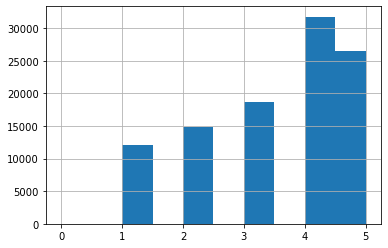

In [517]:
df_1['Seat comfort'].hist()

<AxesSubplot:>

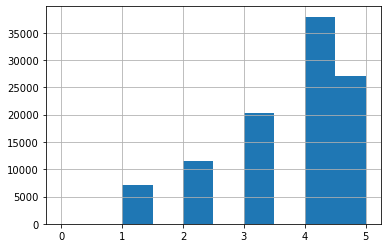

In [518]:
df_1['Inflight service'].hist()

<AxesSubplot:>

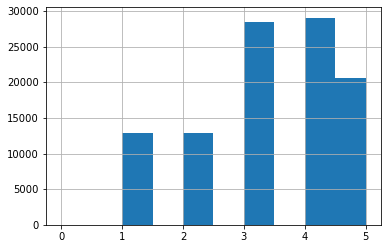

In [519]:
df_1['Checkin service'].hist()

<AxesSubplot:>

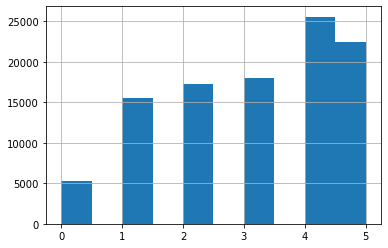

In [520]:
df_1['Departure/Arrival time convenient'].hist()

<AxesSubplot:>

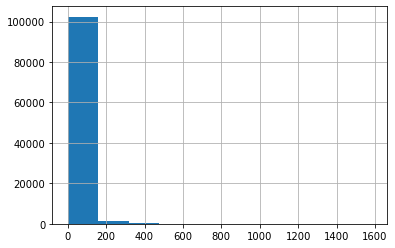

In [521]:
df_1['Arrival Delay in Minutes'].hist()

Как мы видим, наши данные опроса распределены не нормально, поэтому для применения их в логистической регрессии, необходимо нормировать как тестовую, так и валидационную выборки.

2. Нормируем данные

In [522]:
from sklearn.preprocessing import StandardScaler

In [523]:
z_score_scaler = StandardScaler()

z_score_scaler.fit(X_train)

X_train_scaled = z_score_scaler.transform(X_train)
X_valid_scaled = z_score_scaler.transform(X_valid)

3. Создаем модель логистической регрессии.

In [524]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [525]:
X_valid_scaled

array([[ 0.42756338, -1.38835686,  0.55204126, -0.03890005, -0.39086411],
       [-0.33108393,  0.30912845, -1.82111376, -0.03890005, -0.39086411],
       [ 1.18621069,  0.30912845,  1.34309293, -0.69438126,  0.90414448],
       ...,
       [-1.84837855,  0.30912845, -0.23901042, -2.00534367, -0.39086411],
       [-1.08973124,  0.30912845,  0.55204126,  0.61658116,  1.73294998],
       [ 1.18621069, -0.53961421, -1.82111376, -0.69438126, -0.39086411]])

In [526]:
y_predicted = LR.predict(X_valid_scaled)
y_predicted_probs = LR.predict_proba(X_valid_scaled)

In [527]:
y_predicted_probs

array([[0.610842  , 0.389158  ],
       [0.73846167, 0.26153833],
       [0.23246916, 0.76753084],
       ...,
       [0.77364592, 0.22635408],
       [0.75955011, 0.24044989],
       [0.53971904, 0.46028096]])

4. Расчитываем коэффициенты логистической регрессии.

In [528]:
cf = pd.DataFrame({'Coefs' : LR.coef_[0],
                    'Names' : ['Seat comfort', 'Inflight service', 'Checkin service', 'Departure/Arrival time convenient', 'Arrival Delay in Minutes']})
cf = cf.append({'Coefs' : LR.intercept_[0],
                   'Names' : 'intercept'}, ignore_index = True)

C:\Users\Юрий\AppData\Local\Temp\ipykernel_11792\2651603378.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [529]:
cf

,Coefs,Names
0,0.753313,Seat comfort
1,0.471525,Inflight service
2,0.343864,Checkin service
3,-0.207453,Departure/Arrival time convenient
4,-0.103958,Arrival Delay in Minutes
5,-0.356828,intercept


Необходимо проанализировать, все ли полученные коэффициенты являются статистически значимыми.

In [530]:
X2 = sm.add_constant(X_train_scaled)

In [531]:
logit = sm.Logit(y_train, X2)
res_2 = logit.fit()
print(res_2.summary())

Optimization terminated successfully.
         Current function value: 0.577217
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                83123
Model:                          Logit   Df Residuals:                    83117
Method:                           MLE   Df Model:                            5
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.1562
Time:                        22:55:14   Log-Likelihood:                -47980.
converged:                       True   LL-Null:                       -56862.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3568      0.008    -44.904      0.000      -0.372      -0.341
x1             0.7534      0.

Мы видим, что на уровне alpha = 0.05 все полученные коэффициенты логистической регрессии статистически значимы.

Теперь необходимо интерпретировать полученные коэффициенты логистической регрессии.

In [532]:
cf['Odds cf'] = np.exp(cf['Coefs'])
cf

,Coefs,Names,Odds cf
0,0.753313,Seat comfort,2.124026
1,0.471525,Inflight service,1.602435
2,0.343864,Checkin service,1.410387
3,-0.207453,Departure/Arrival time convenient,0.812651
4,-0.103958,Arrival Delay in Minutes,0.901263
5,-0.356828,intercept,0.699893


Таким образом, при увеличении счёта показателя "Seat comfort" на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 2,13 раз.

При увеличении счёта показателя "Inflight service" на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 1,61 раза.

При увеличении счёта показателя "Checkin service" на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 1,41 раз.

При увеличении счёта показателя "Departure/Arrival time convenient" на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 0,81 раза, то есть вероятность уменьшается.

При увеличении счёта показателя "Arrival Delay in Minutes" на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 0,9 раза, то есть вероятность уменьшается.

5. Оценка качества полученной модели логистической регрессии.

In [533]:
from sklearn.metrics import accuracy_score, f1_score,\
recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [534]:
accuracy_score(y_valid, y_pred)
print('Accuracy_valid :', accuracy_score(y_valid, y_pred))
print('Accuracy_test :', accuracy_score(y_train, LR.predict(X_train_scaled)))

Accuracy_valid : 0.8734902074009913
Accuracy_test : 0.7139419895817042


Метрика Accuracy показывает, какова доля угаданных значений целевой переменной "satisfaction" среди всех угаданных значений.
Мы видим, что у нашей модели на валидационных данных Accuracy = 87,4 %, что говорит о высокой точности модели, так как не угадала она всего 12,6% значений. У валидационной выборки данная метрика выше, чем у тестовой, так как валидационная выборка содержит меньше данных, и количество выбросов и аномальных значений, усложняющих точность предсказания, меньше.

In [535]:
print('F1_score_valid: ', f1_score(y_valid, y_pred))
print('F1_score_test: ', f1_score(y_train, LR.predict(X_train_scaled)))

F1_score_valid:  0.851862286583648
F1_score_test:  0.6603822092724312


Метрика F1 явлляется агрегированным показателем на основе метрик "recall" (доля объектов положительного класса из всех объектов положительного класса нашла модель) и "Precision" (доля объектов, названных классификатором положительными и при этом действительно являющиеся положительными)

Метрика F1 нашей модели достаточно высокая (0.85), что говорит о низком количестве ошибок первого и второго рода.

У валидационной выборки данная метрика выше, чем у тестовой, так как валидационная выборка содержит меньше данных, и количество выбросов и аномальных значений, усложняющих точность предсказания, меньше.
Таким образом, мы можем сказать, что модель сработала на валидационных данных лучше, чем на тестовых, она более точна.

In [536]:
print('Recall_valid: ', recall_score(y_valid, y_pred))
print('Recall_test: ', recall_score(y_train, LR.predict(X_train_scaled)))

Recall_valid:  0.8346952296819788
Recall_test:  0.6427201201034224


Метрика Recall показывает долю объектов положительного класса из всех объектов положительного класса и интерпретируется как полнота модели. У валидационный выборки показатель достаточно высокий (0,84)  и выше чем у тестовой выборки (0,64), поэтому наша модель на валидационных данных обладает высокой степенью полноты. 

In [537]:
print('Precision_valid: ', precision_score(y_valid, y_pred))
print('Precision_test: ', precision_score(y_train, LR.predict(X_train_scaled)))

Precision_valid:  0.8697503164192844
Precision_test:  0.6790424438243501


Метрика Precision показывает долю объектов, названных классификатором положительными и при этом действительно являющиеся положительными и интерпретируется как полнота модели. У валидационный выборки показатель достаточно высокий (0,87) и выше чем у тестовой выборки (0,68), поэтому наша модель на валидационных данных обладает высокой степенью точности.

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



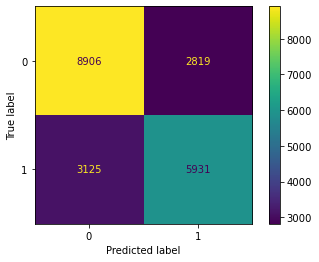

In [538]:
plot_confusion_matrix(LR, X_valid_scaled, y_valid)

In [539]:
confusion_matrix(y_valid, y_pred)

array([[10593,  1132],
       [ 1497,  7559]], dtype=int64)

Действительно, мы видим по матрице ошибок, что на валидационной выборке модель сделала относительно намного меньше ошибок как 1, так и 2 рода, чем на тестовой.

Ещё одной метрикой качества полученных моделей является показатель AUC - площадь под кривой. Чем он выше, тем большую часть данных объясняет наша модель.

Построим два графика ROC-кривых для тестовой и валидационной выборки.

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

C:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



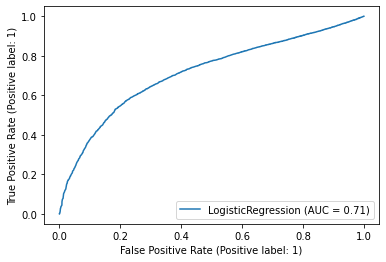

In [540]:
plot_roc_curve(LR, X_valid, y_valid)

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



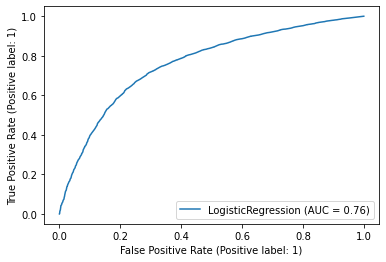

In [541]:
plot_roc_curve(LR, X_train_scaled, y_train)

Мы получили показатель AUC для  валидационной выборки: 0,71, то есть,нана модель объясняет 71% данных, а для тестовых данных 0,76, то есть модель объясняет 76% тестовых данных. Так как различие в показателях невысокое, мы можем судить об адекватности применения модели для валидационных данных.

Таким образом, беря в расчёт все метрики качества полученной модели для валидационной и тестовой выборки, мы можем говорить о состоятельночти модели и достаточно высоком уровне точности, следовательно, мы можем её использовать для прогнозирвания и описания влияния предикторов на целевую переменную.

# Выводы по гипотезам 2-6

Таким образом, возвращаясь к Гипотезам 2-6 по итогам построения модели логистической регрессии можно сделать следующие выводы:

Гипотеза 2 подтверждается: Комфорт сиденья на борту оказывает значимое положительное влияние на итоговый уровень удовлетворённости потребителя, с увеличением предиктора на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 2,13 раз.

Гипотеза 3 подтверждается: Обслуживание на борту оказывает значимое положительное влияние на итоговый уровень удовлетворённости потребителя, с увеличением предиктора на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 1,61 раза.

Гипотеза 4 подвтерждается: Обслуживание на стойках регистрации оказывает значимое положительное влияние на итоговый уровень удовлетворённости потребителя, с увеличением приедиктора на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 1,41 раз.

Гипотеза 5 НЕ подтверждается : Удобство времени отправления/прибытия не оказывает значимое положительное влияние на итоговый уровень удовлетворённости потребителя, так как с увеличением показателя предиктора на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 0,81 раза, то есть вероятность уменьшается.

Гипотеза 6 подтверждается: Задержка прибытия рейса оказывает значимое отрицательное влияние на итоговый уровень удовлетворённости потребителя, так как с увеличением предиктора на 1 стандартное отклонение, логарифм шанса, что клиент будет удовлетворён сервисом авиакомпании увеличивается в 0,9 раза, то есть вероятность уменьшается.


# Гипотеза 7

Для проверки гипотезы 7 нам необходимо воспользоваться моделью линейной регрессии.

Предпосылкой для использования модели линейной регрессии является отсутствие мультиколлинеарности между независимыми переменными. Как мы видим на корреляционной матрице ниже, мультиколлинеарность отсутствует, так как кросс-корреляции умернные и низкие.

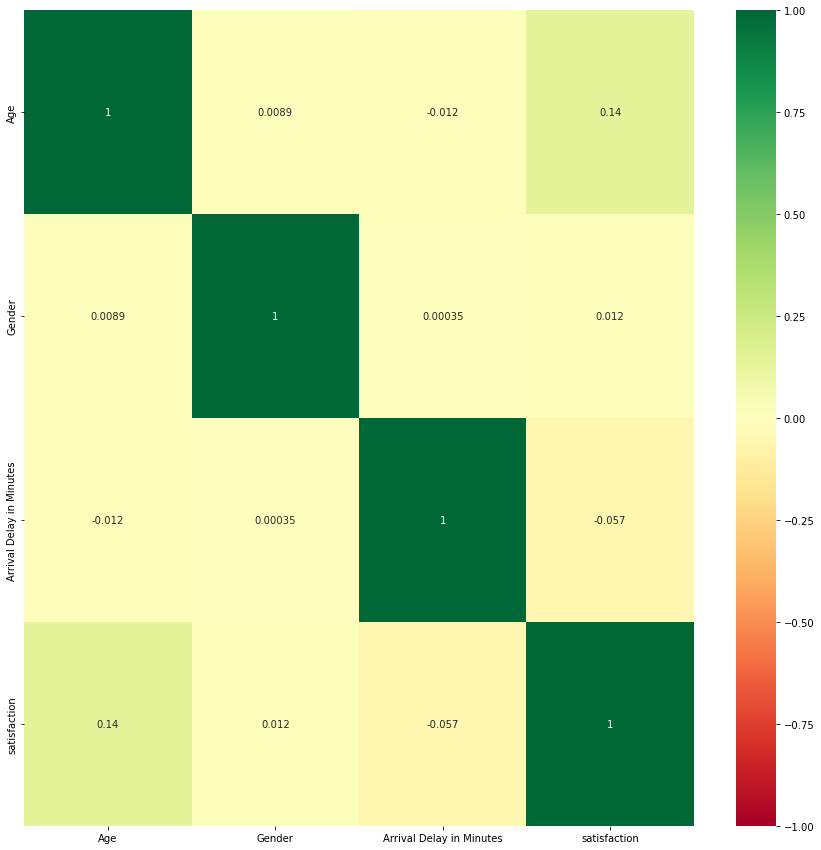

In [542]:
plt.figure(figsize = (15,15))
heat = sns.heatmap(df_1.corr(), annot = True, cmap = 'RdYlGn', vmax = 1, vmin = -1)

In [543]:
df['Age'].corr(df['Arrival Delay in Minutes'])

-0.012104789905199177

Также мы видим низкий показатель корреляции между возрастом и задержкой прибытия самолёта. Что уже наталкивает нас на то, что возраст с низкой доли вероятности будет объяснять задержку в прилёте рейса.

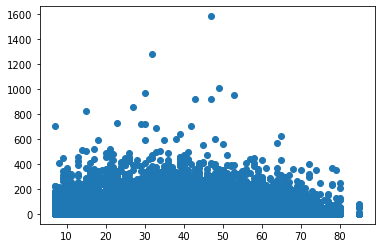

In [544]:
plt.scatter(x = df['Age'], y =df['Arrival Delay in Minutes'] )

In [545]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Построим модель линейной регрессии для переменных 'Arrival Delay in Minutes' (зависимая) и 'Age' (независимая переменная)

In [546]:
y_lin = df_1['Arrival Delay in Minutes']
X_lin = df_1.drop('Arrival Delay in Minutes', axis = 1)

In [547]:
lin = LinearRegression()

In [548]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.3, random_state = 10)

In [549]:
reg = lin.fit(X_train_lin, y_train_lin)

In [550]:
predictions = lin.predict(X_test_lin)

In [551]:
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train_lin, y_train_lin))

[-0.01709988  0.22415349 -0.37012271 -1.62809884  0.09504501  0.02733715
 -3.2138809 ]
23.90912684116732
0.005626419619051193


Как мы можем видеть, уже на тестовой выборке модель получается неточная: коэффициент детерминации крайне низкий (0,00588), следовательно, построенная модель, равно как и её предикторы не объясняют изменения целевой переменной.
Более наглядно это отображает график ниже:

In [552]:
from scipy import stats
x = y_test_lin
y = predictions
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
idx = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']
data = np.array([slope, intercept, r_value, p_value, std_err])
print(pd.DataFrame(data= data, index= idx , columns =['values']))
regline = lambda S: 0.006064754*x +15.03097
S=np.array([x.min(),x.max()])

                 values
slope      5.813464e-03
intercept  1.503752e+01
r_value    7.520951e-02
p_value    2.409806e-40
std_err    4.365782e-04


Text(0.5, 1.0, 'Predicted Delay vs Real Delay')

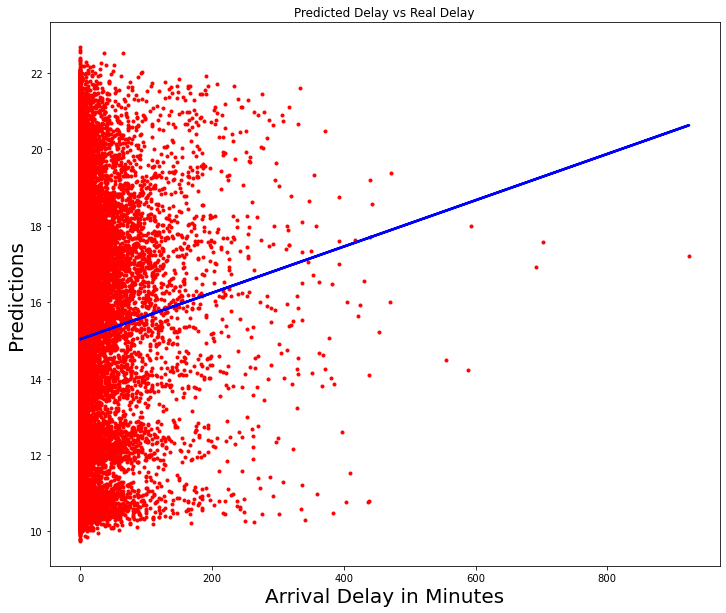

In [553]:
plt.figure(figsize=(12,10))
plt.scatter(y_test,predictions,color='Red',marker='.')
plt.plot(x,regline(S),lw=2.5, c="BLUE")
plt.xlabel("Arrival Delay in Minutes",{'size':20})
plt.ylabel("Predictions",{'size':20})
plt.title("Predicted Delay vs Real Delay")

# Вывод по гипотезе 7

Гипотеза 7 отвергается: как показала построенная модель линейной регрессии, возраст, как и все другие предикторы не объясняют бОльшую часть данных целевой переменной задержка прилёта самолёта. 

Отдел маркетинга авиакомпании оказался прав: переменную задержки прибытия рейса объясняют внешние факторы, не представленные в данном исследовании.

# Выводы и рекомендации для авиакомпании

1. Несмотря на то, что число опрошенных женщин и мужчин одинаково, стоит таргетировать маркетинговые коммуникации отдельно на мужскую и женскую аудиторию, так как у них имеются значимые различия в уровне удовлетворённости сервисом авиакомпании.
2. Комфорт сиденья, обслуживание на борту и обслуживание на стойке регистрации являются важными элементами сервиса, положительно влияющие на уровень удовлетворённости клиентов авиакомпании. Компании стоит работать над маркетинговой и сервисной стратегией в этих направлениях, например: провести тренинг с работниками стоек регистрации и бортпроводниками по вопросу улучшения клиентского опыта, а также увеличить количество кресел повышенной комфортности на борту.
3. Удобство времени вылета и прилёта оказывает отрицательное влияние на удовлетворённость клиента, поэтому авиакомпания может не менять сетку расписания.
4. Компании стоит тщательно работать над пунктуальностью рейсов: только 56% рейсов прилетели вовремя и это, как показало данное исследование, отрицательно влияет на клиентскую удовлетворённость.